In [19]:
import pandas as pd
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
path = '/Volumes/home/Research/STEP/02_Station_result_csv'

In [66]:
cmap = mpl.colors.ListedColormap(['blue','royalblue', 
                                  'skyblue'])
cmap.set_over('lightblue')
bounds = [0, 0.3, 0.7, 1.2]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

/var/folders/sp/pnngww1n0q31w2plgbk53rc00000gn/T/ipykernel_61502/3927538683.py:25: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.scatter(cph,phi_list,c=rho, marker='o', linewidths=0.01, cmap=cmap, norm=norm, vmin=0, vmax=1.6)


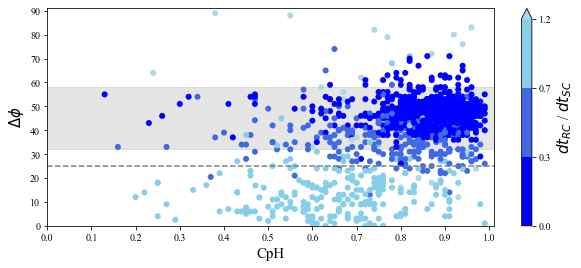

In [70]:
plt.figure(figsize=(10,4))
plt.rc('font',family='Times New Roman')
plt.fill_between(x=np.arange(0,1.2,0.1), y1=32, y2=58, color='grey', alpha=0.2)
for csvpath in glob.glob(f'{path}/*/*v2.csv'):
    sta  = csvpath.rsplit('.')[1].rsplit('_')[0]
    if sta not in ['DGRL', 'MAKU','CMCY']:
        df = pd.read_csv(csvpath)
        df = df[df['Pick']==True]
        cph = df['CpH']
        RCphi = df['RCPhi']
        SCphi = df['SCPhi']
        RCdt = df['RCdt']
        SCdt = df['SCdt']    
        
        rho  = RCdt/SCdt
        phi_list = []
        for ii,jj in zip(RCphi,SCphi):
            dphi = max(abs(ii-jj), abs(jj-ii))
            if dphi >90:
                dphi = 180-dphi
            else: 
                pass
            phi_list.append(dphi)

        plt.scatter(cph,phi_list,c=rho, marker='o', linewidths=0.01, cmap=cmap, norm=norm, vmin=0, vmax=1.6)
cb = plt.colorbar(extend='max')
cb.set_label(r'$dt_{RC}$ / $dt_{SC}$', fontsize=15)

plt.hlines(y=25,xmin=0,xmax=1.01,color='grey',linestyle='--')
plt.xlabel('CpH',fontsize=15)
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,91,10))
plt.xlim(0,1.01)
plt.ylim(0,91)
plt.ylabel(r'$\Delta \phi$', fontsize=15)
plt.savefig('PCA_delta_v1.png',dpi=150)
plt.savefig('PCA_delta_v1.pdf')